# NYU - CUSP UDP Capstone
# Topologies Master 
## Brief
This notebook 
- imports the shapefile
- imports topologies results
- merges shapefiles with topologies
- map topologies
- outputs a .csv of the results


In [2]:
#! pip install geopandas
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
# from sklearn.linear_model import LogisticRegression
# from sklearn import svm
# from sklearn.metrics import confusion_matrix
# from sklearn import datasets
# from sklearn.decomposition import PCA
# from sklearn import preprocessing
%pylab inline

# To ignore some warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import os
import requests
import shapely
import json
from fiona.crs import from_epsg
# import scipy as sp
# from scipy import stats
# import geopy.distance
#from getCitiBikeCSV import getCitiBikeCSV # must have this function locally or in path
#pd.options.display.max_columns = None
DEVELOPING = False
#from get_jsonparsed_data import get_jsonparsed_data # must have this function locally or in path
#from evalChisq import evalChisqgeoid

Populating the interactive namespace from numpy and matplotlib


In [3]:
import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas import GeoDataFrame
from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Import Shape Files
#### Retrieved from latest Census 2016 results from NYC Planning Metro Region Explorer:
https://metroexplorer.planning.nyc.gov/about

and four missing census tracts from census.gov American Fact Finder:
https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml

In [7]:
NYCzip=gpd.read_file('Censustracts/region.shp')

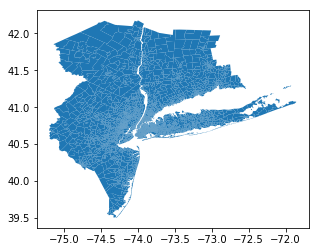

In [8]:
NYCzip.plot()

In [9]:
NYCzip.columns

Index(['aland_mi', 'objectid', 'statefp', 'countyfp', 'tractce', 'geoid',
       'name', 'namelsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat',
       'intptlon', 'shape_leng', 'shape_area', 'atotal', 'atotal_mi',
       'cartodb_id', 'geoid_1', 'hou16', 'hou16moe', 'hou16cv', 'houv16',
       'houv16moe', 'houv16cv', 'houo16', 'houo16moe', 'houo16cv', 'hour16',
       'hour16moe', 'hour16cv', 'emtot15', 'empr15', 'emoff15', 'emins15',
       'emind15', 'emser15', 'emoth15', 'geometry'],
      dtype='object')

In [10]:
NYCzip.rename(columns={"geoid": "GEOID"},inplace=True)
NYCzip.GEOID = NYCzip.GEOID.astype(int)
cols = ['GEOID','geometry']
NYCzip = NYCzip.loc[:,cols]
#NYCzipgdp.plot(column='GEOID',legend = True)
NYCzip.shape

(5294, 2)

In [11]:
NYCzip.isnull().sum()

GEOID       0
geometry    0
dtype: int64

In [12]:
# NYCzipgdp.dropna(inplace=True)
NYCzip.shape

(5294, 2)

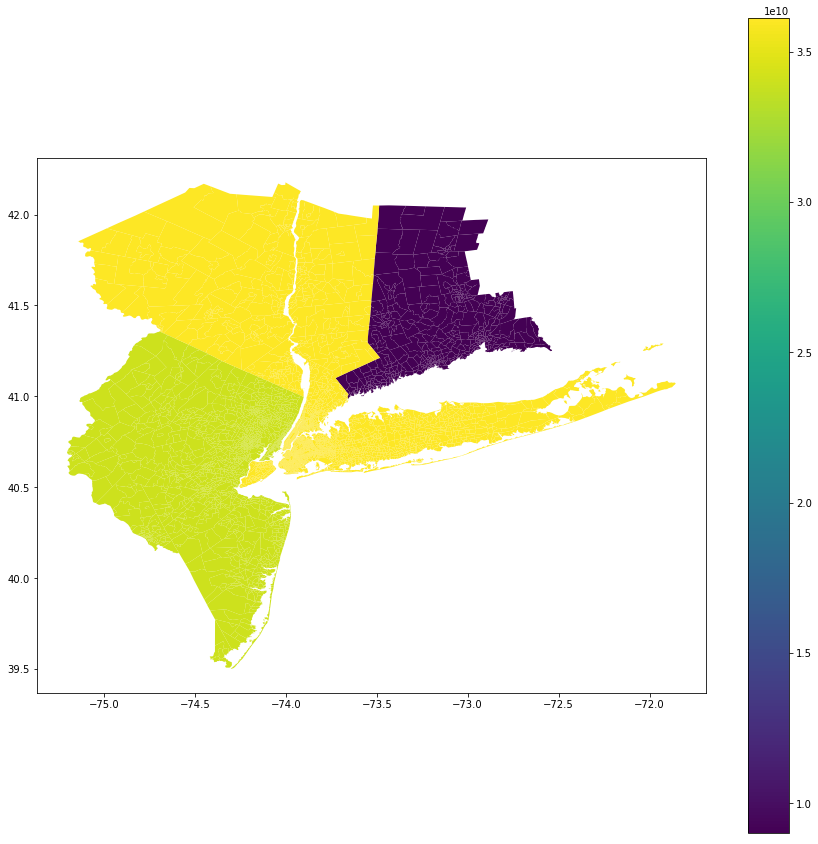

In [13]:
figure, ax = plt.subplots(figsize=(15, 15))
NYCzip.plot(column='GEOID',legend = True, ax=ax)

In [14]:
(NYCzip.GEOID == 34005701502).sum()

0

In [56]:
others_zip = gpd.read_file('Censustracts/reference_map_shape/14000.shp')
# i 34005701502
# i 34005701700
# i 34005981802
# i 36085990100
others_zip


,GEO_ID,STATE,COUNTY,TRACT,NAME,LSAD,SHAPE_AREA,SHAPE_LEN,geometry
0,1400000US34005981802,34,005,981802,9818.02,Tract,4.441712e+06,10337.630444,"POLYGON ((-8313617.3146 4888372.220200002, -83..."
1,1400000US34005701502,34,005,701502,7015.02,Tract,1.197197e+07,19772.462733,"POLYGON ((-8316997.0856 4891391.936499998, -83..."
2,1400000US34005701700,34,005,701700,7017,Tract,4.314335e+06,9303.626332,"POLYGON ((-8317731.9056 4887429.785599999, -83..."
3,1400000US36085990100,36,085,990100,9901,Tract,1.390466e+08,72313.254697,POLYGON ((-8266483.974300001 4938804.908699997...


In [57]:
others_zip.rename(columns={"GEO_ID": "GEOID"},inplace=True)
print(type(others_zip.GEOID[0]))
others_zip.GEOID = others_zip.GEOID.str[-11:]
others_zip


<class 'str'>


,GEOID,STATE,COUNTY,TRACT,NAME,LSAD,SHAPE_AREA,SHAPE_LEN,geometry
0,34005981802,34,005,981802,9818.02,Tract,4.441712e+06,10337.630444,"POLYGON ((-8313617.3146 4888372.220200002, -83..."
1,34005701502,34,005,701502,7015.02,Tract,1.197197e+07,19772.462733,"POLYGON ((-8316997.0856 4891391.936499998, -83..."
2,34005701700,34,005,701700,7017,Tract,4.314335e+06,9303.626332,"POLYGON ((-8317731.9056 4887429.785599999, -83..."
3,36085990100,36,085,990100,9901,Tract,1.390466e+08,72313.254697,POLYGON ((-8266483.974300001 4938804.908699997...


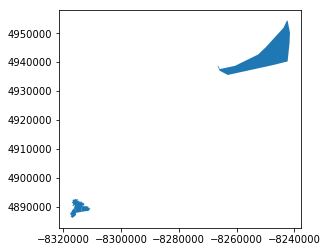

In [58]:
others_zip.plot()

In [59]:
others_zip.GEOID = others_zip.GEOID.astype(int)
cols = ['GEOID','geometry']
others_zip = others_zip.loc[:,cols]

In [60]:
print(others_zip.crs)
others_zip.to_crs(epsg=4326, inplace = True)
print(others_zip.crs)


{'init': 'epsg:3857'}
{'init': 'epsg:4326', 'no_defs': True}


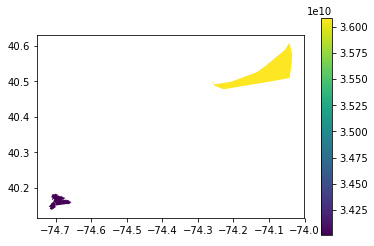

In [61]:
others_zip.plot(column='GEOID',legend = True)

In [63]:
NYCzip_other = NYCzip.append(others_zip)

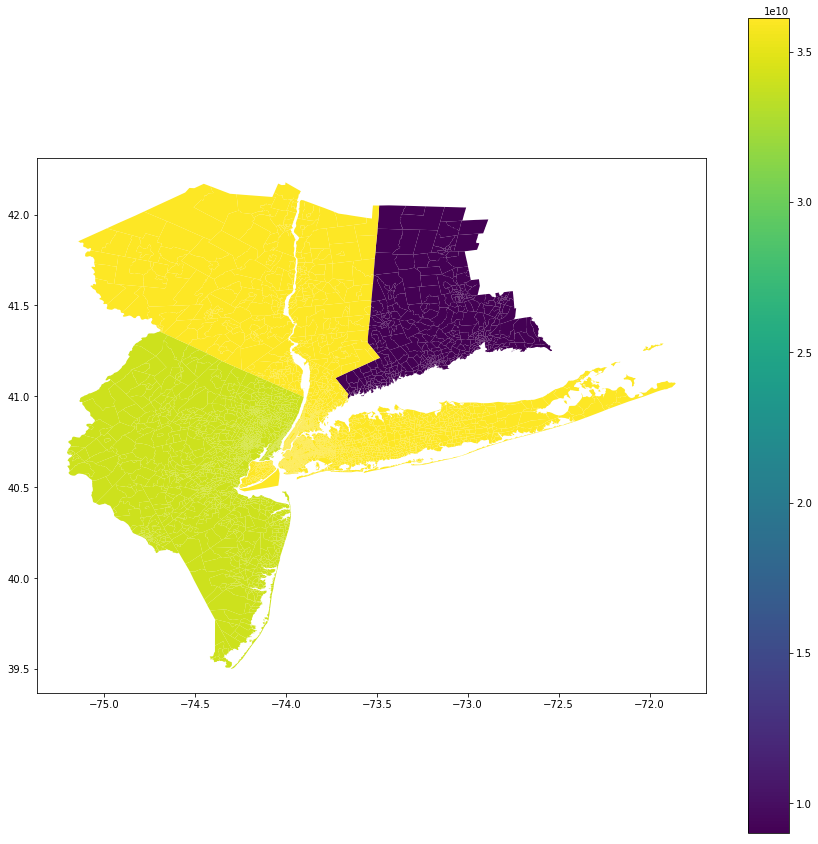

In [64]:
figure, ax = plt.subplots(figsize= (15, 15))
NYCzip_other.plot(column='GEOID',legend = True, ax=ax)

In [65]:
(NYCzip_other.GEOID == 34005701502).sum()


1

In [68]:

print(type(NYCzip))
print(type(others_zip))
print(NYCzip.crs,others_zip.crs)
NYCzip_other = gpd.GeoDataFrame(NYCzip_other)
print(NYCzip_other.shape)
NYCzip_other.reset_index(inplace = True)
NYCzip_other = NYCzip_other.drop('index',axis =1)
                

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>
{'init': 'epsg:4326'} {'init': 'epsg:4326', 'no_defs': True}
(5298, 2)


In [70]:
NYCzip_other.tail()

,GEOID,geometry
5293,36047152200,"POLYGON ((-73.96408699991511 40.6444069999831,..."
5294,34005981802,POLYGON ((-74.68249500025873 40.15417699991769...
5295,34005701502,POLYGON ((-74.71285599971995 40.17490700008254...
5296,34005701700,POLYGON ((-74.71945700009073 40.14770600025449...
5297,36085990100,POLYGON ((-74.25908900042775 40.49956100018636...


# Import Latest Typologies (Jan 2019)
#### Retrieved from latest results from Jan 19. Provided by Dr. Karen Chapple by email on April 12th 2019.

In [71]:
Typologiespd=pd.read_csv('NY_January_2019_typology.csv')
Typologiesgdp = gpd.GeoDataFrame(Typologiespd)
Typologiesgdp.columns

Index(['geoid', 'Type_1.19'], dtype='object')

In [72]:
Typologiesgdp.rename(columns={'geoid': "GEOID"},inplace=True)
Typologiesgdp.tail()

,GEOID,Type_1.19
5289,36119981000,MHI - Stable or Early Stage of Exclusion
5290,36119982000,Missing Data
5291,36119983000,MHI - Stable or Early Stage of Exclusion
5292,36119984000,Missing Data
5293,36119985000,Missing Data


In [73]:
cols_typ = ['GEOID','Type_1.19']
print(type(Typologiesgdp.iloc[:,0][0]))
#Typologies.rename(columns={'\ufeffgeoid': "GEOID"},inplace=True)
#Typologiesgdp.geoid = Typologies.iloc[:,0]
Typologiesgdp = Typologiesgdp.loc[:,cols_typ]
Typologiesgdp.head()

<class 'numpy.int64'>


,GEOID,Type_1.19
0,9001010101,VHI - Super Gentrification or Exclusion
1,9001010102,VHI - Super Gentrification or Exclusion
2,9001010201,VHI - Super Gentrification or Exclusion
3,9001010202,VHI - Super Gentrification or Exclusion
4,9001010300,VHI - Super Gentrification or Exclusion


In [74]:
Typologiesgdp.shape

(5294, 2)

In [75]:
Typologiesgdp.dropna(inplace=True)
Typologiesgdp.GEOID = Typologiesgdp.GEOID.astype(int)

## Clean Data

## Clean Typologies

In [76]:
#NYCzipgdp.isnull().sum()
Typologiesgdp.isin([0]).sum()

GEOID        0
Type_1.19    0
dtype: int64

In [77]:
Typologiesgdp.isnull().sum()

GEOID        0
Type_1.19    0
dtype: int64

In [78]:
print(len(Typologiesgdp.GEOID.unique()))
Typologiesgdp.dropna(inplace=True)
Typologiesgdp.shape

5294


(5294, 2)

In [79]:
Typologiesgdp =Typologiesgdp.drop_duplicates()
Typologiesgdp.shape

(5294, 2)

In [80]:
# print(NYCzipgdp.shape)
Typologiespd.rename(columns={'geoid': "GEOID"},inplace=True)
Typologiespd[Typologiespd.GEOID==36047021000]

,GEOID,Type_1.19
2574,36047021000,LI - Not Losing Low-Income Households


In [81]:
Typologiesgdp.tail()

,GEOID,Type_1.19
5289,36119981000,MHI - Stable or Early Stage of Exclusion
5290,36119982000,Missing Data
5291,36119983000,MHI - Stable or Early Stage of Exclusion
5292,36119984000,Missing Data
5293,36119985000,Missing Data


### MERGE

In [95]:
merged = NYCzip_other.merge(Typologiesgdp,on='GEOID')
merged.tail()

,GEOID,geometry,Type_1.19
5289,36047152200,"POLYGON ((-73.96408699991511 40.6444069999831,...",MHI - Stable or Early Stage of Exclusion
5290,34005981802,POLYGON ((-74.68249500025873 40.15417699991769...,Missing Data
5291,34005701502,POLYGON ((-74.71285599971995 40.17490700008254...,Missing Data
5292,34005701700,POLYGON ((-74.71945700009073 40.14770600025449...,Missing Data
5293,36085990100,POLYGON ((-74.25908900042775 40.49956100018636...,Missing Data


In [96]:
print(type(merged),merged.shape)
mergedgpd = gpd.GeoDataFrame(merged)
mergedgpd.shape

<class 'geopandas.geodataframe.GeoDataFrame'> (5294, 3)


(5294, 3)

In [97]:
mergedgpd.isnull().sum()

GEOID        0
geometry     0
Type_1.19    0
dtype: int64

In [98]:
print(len(Typologiesgdp.GEOID),len(mergedgpd.GEOID))
print(type(Typologiesgdp.GEOID),type(mergedgpd.GEOID))
 

5294 5294
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [99]:
excluded = []
for i in Typologiesgdp.GEOID:
    if i not in list(mergedgpd.GEOID):
        print('i',i)
        excluded.append(i)
excluded

[]

In [100]:
excluded = []
for i in NYCzip.GEOID:
    if i not in list(mergedgpd.GEOID):
        print('i',i)
        excluded.append(i)
excluded

i 9001080500
i 9009180100
i 9001022400
i 9009142300


[9001080500, 9009180100, 9001022400, 9009142300]

In [101]:
(NYCzip.GEOID == 36061022102).sum()

1

In [102]:
# mergedgpd.crs = from_epsg(4326)
# mergedgpd.crs

In [103]:
# mergedgpd.to_crs(epsg=2263, inplace = True)
# mergedgpd.crs

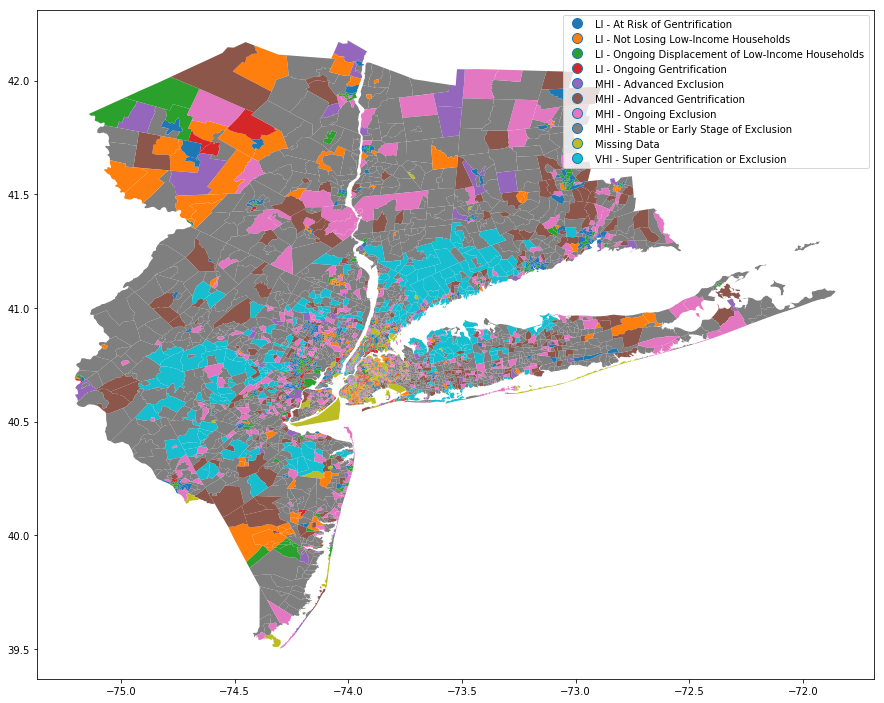

In [104]:
figure, ax = plt.subplots(figsize=(15, 15))
mergedgpd.plot(column='Type_1.19',legend = True, ax=ax)

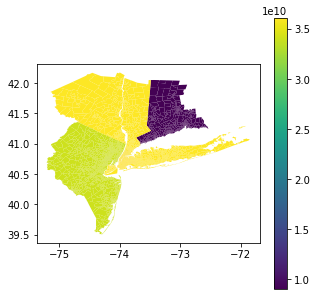

In [106]:
figure, ax = plt.subplots(figsize=(5, 5))
mergedgpd.plot(column='GEOID',legend = True, ax=ax)

In [ ]:
mergedgpd.to_csv('UDPNY_Typology_final_1.19.19.csv')